In [1]:
import networkx as nx
import matplotlib # if abbreviating this, use "as mpl"
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import pandas as pd
#%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

%matplotlib notebook

In [40]:
### Nodes ###

coord = pd.read_csv('../preprocesses/section_data/net_coord.csv')
coord = coord[["NodeID","CoordX", "CoordY"]].copy()

#with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
#    print(coord)
  
### What am I doing? ###
#
#open data file about information of all nodes, using only the coordinates

,NodeID,CoordX,CoordY,TagText,TagProperties,TagDeltaX,TagDeltaY,TagAngle,TagAlignment,TagBorder,...,MaximumLoadShed,ShedLoadCost,UserDefinedBaseVoltage,RatedVoltage,RatedCurrent,ANSISymCurrent,ANSIAsymCurrent,PeakCurrent,Standard,Installation
0,201827771,912872.500000,450983.331000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,42784779-SPOTLOAD,553936.808426,146115.680388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,42933083,888887.500000,326986.330950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,52894498,804812.500000,578983.330950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,42805981,554167.347000,145823.926000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,42875178,819443.716072,539095.272274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,52061191,824993.716072,311092.272274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,42762171-SPOTLOAD,554234.887258,145830.116397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,42773422,554224.880000,146486.816000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,42774787-SPOTLOAD,554004.786862,145857.488915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
### Nodes ###

subnetwork_connections = pd.read_csv('../preprocesses/section_data/result_subnetwork_connections.csv')

subnetwork_connections = subnetwork_connections[["NodeID", "ConnectorCoordX", "ConnectorCoordY"]].copy()

subnetwork_connections = subnetwork_connections.rename(index=str, columns={"ConnectorCoordX": "CoordX", "ConnectorCoordY": "CoordY"})

subnetwork_connections['NodeID'] = subnetwork_connections['NodeID'].astype(str)


#with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
#    print(subnetwork_connections)


### What am I doing? ###
#
# open file about the subnetwork_connection nodes, changing column names of the coordinates,
# so it fit with the DataFrame of the node coordinates

        NodeID         CoordX         CoordY
0     52878178  553852.639409  145587.960834
1     52878186  553855.073635  145591.289218
2     52878194  553858.725239  145596.282156
3     53071194  553945.141333  145628.150687
4     53071202  553950.054696  145627.476492
5     53071210  553950.894055  145628.785481
6     53071218  553951.144215  145629.175608
7     53071226  553952.233942  145630.875048
8     53071234  553946.251093  145629.881368
9     53071242  553948.454457  145633.317536
10    53071250  553947.360536  145631.611556
11    53077066  554238.333159  145588.590133
12    53077074  554238.283626  145590.637389
13    53077082  554238.234073  145592.685480
14    52061191  553606.508906  146380.699106
15    52061201  553613.215165  146384.252988
16    52061211  553613.509197  146385.130729
17    52061221  553612.298271  146381.515883
18    52946922  554142.290993  145673.075936
19    52946930  554144.104265  145672.003338
20    52946938  554138.671725  145675.216827
21    5294

In [4]:
### Nodes ###


intermediate_nodes = pd.read_csv('../preprocesses/section_data/intermediate_coords.csv')


intermediate_nodes = intermediate_nodes[["SectionID", "CoordX", "CoordY"]].copy()

intermediate_nodes = intermediate_nodes.rename(index=str, columns={"SectionID": "NodeID"})

intermediate_nodes['NodeID'] = intermediate_nodes['NodeID'].astype(str)


#with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
#    print(intermediate_nodes)
    
### What am I doing? ###
#
# open file about intermediate nodesm with their SectionID, SeqNumber and each coordinates
#
# Wikipedia: In such a network the source and destination cannot communicate to each other directly because
#            the distance between the source and destination is greater than the transmission range of both of them, 
#            hence the need for intermediate node(s) to relay.

             NodeID         CoordX         CoordY
0      160232402(0)  554220.352000  146210.115000
1       43966944(0)  554328.299000  146566.836000
2       43966944(1)  554335.999000  146566.836000
3       43966944(2)  554336.356000  146574.455000
4       43966944(3)  554331.866000  146575.979000
5       43966944(4)  554324.583000  146577.692000
6       43966944(5)  554319.233000  146578.554000
7       43966944(6)  554313.943000  146579.139000
8       43966944(7)  554306.375000  146579.139000
9       43966944(8)  554299.766000  146578.963000
10      43966944(9)  554296.332000  146578.641000
11     43966944(10)  554291.171000  146577.829000
12     43966944(11)  554283.304000  146576.762000
13     43966944(12)  554279.030000  146576.302000
14      43968073(0)  554230.035000  145709.713000
15      43968073(1)  554231.949000  145718.190000
16      43968073(2)  554234.232000  145717.674000
17      43968073(3)  554241.213000  145716.097000
18      43968073(4)  554242.769000  145721.691000


In [5]:
### Nodes ###

intermediate_nodes_sep = intermediate_nodes.rename(index=str, columns={"SectionID": "NodeID"})

frames = [coord,subnetwork_connections, intermediate_nodes_sep] 
coord = pd.concat(frames)
#coord



### What am I doing? ###
#
# Connect the tables of the nodes and subnetwork nodes: the subnetwork nodes are now twice in the list, one time with
# "wrong" coordinates and one time with the correct ones.
# Intermediate_nodes are put in the node coordinate table, to be displayed in the graph

,NodeID,CoordX,CoordY
0,201827771,912872.500000,450983.331000
1,42784779-SPOTLOAD,553936.808426,146115.680388
2,42933083,888887.500000,326986.330950
3,52894498,804812.500000,578983.330950
4,42805981,554167.347000,145823.926000
5,42875178,819443.716072,539095.272274
6,52061191,824993.716072,311092.272274
7,42762171-SPOTLOAD,554234.887258,145830.116397
8,42773422,554224.880000,146486.816000
9,42774787-SPOTLOAD,554004.786862,145857.488915


In [6]:
### Nodes ###

del_coordX = coord[coord["CoordX"] >= 555000] # one zero to much

del_coord = del_coordX[del_coordX["CoordY"] >= 150000] # one zero to much

#del_coord = del_coord[~del_coord['NodeID'].isin(subnetwork_connections['NodeID'])] # not necessary I guess
#del_coord = del_coord[~del_coord['NodeID'].isin(intermediate_nodes['NodeID'])]


del_coord = pd.DataFrame(del_coord["NodeID"].reset_index(drop=True))
del_coord["NodeID"] = del_coord["NodeID"].astype(str)

#with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
#    print(del_coord)
    
### What am I doing? ###
#
# Creating a table (del_coord) with all the nodes that are out of the considered intervall
# and have therefore wrong coordinates. 


                  NodeID
0              201827771
1               42933083
2               52894498
3               42875178
4               52061191
5               42891158
6               42902616
7              214656182
8               42895116
9               42940860
10              42952609
11              42967485
12              42946325
13             214665360
14              42937039
15              52100288
16              52101422
17              88865486
18             173096817
19              42944290
20              52906786
21              42875417
22              42981165
23              53071234
24              99961809
25              42943461
26             159486510
27              42875427
28              52881370
29              42981085
30              52933530
31              42934194
32              52892018
33              52914730
34              88868655
35              52903138
36              88868665
37             137007564
38              88868675


In [7]:
### Section ###

section_orig = pd.read_csv('../preprocesses/section_data/result_section.csv')

section = section_orig[["SectionID", "FromNodeID", "ToNodeID"]].copy()

#section = section.rename(index=str, columns={"": "", "": ""})

section['SectionID'] = section['SectionID'].astype(str)
section['FromNodeID'] = section['FromNodeID'].astype(str)
section['ToNodeID'] = section['ToNodeID'].astype(str)

#with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
#    print(section)

### What am I doing? ###
#
# Table about the connections of each nodes: sections.

                              SectionID FromNodeID  \
0                              42571222   42901266   
1                              42533575   42890834   
2                              43939209   42787380   
3                              43825506   42698357   
4                              43971553   42703621   
5                              94588448   52857530   
6                     42783662-SPOTLOAD   42783662   
7                              43895417   52889602   
8                              42533570   42890835   
9                              43906026   42785340   
10                             43939204   42660293   
11                    42787380-SPOTLOAD   42787380   
12                             93849829   93848443   
13                             43884803   42686073   
14                             42571224   42901268   
15                    42769314-SPOTLOAD   42769314   
16                             52107522   42890831   
17                          

In [8]:
intermediate_connections = pd.read_csv('../preprocesses/section_data/intermediate_nodes.csv')

intermediate_connections = intermediate_connections[["SectionID", "FromNodeID", "ToNodeID"]].copy()
intermediate_connections['SectionID'] = intermediate_connections['SectionID'].astype(str)
intermediate_connections['FromNodeID'] = intermediate_connections['FromNodeID'].astype(str)
intermediate_connections['ToNodeID'] = intermediate_connections['ToNodeID'].astype(str)

intermediate_connections = intermediate_connections.drop_duplicates(subset=['FromNodeID'], keep='first', inplace=False).reset_index(drop=True)
#intermediate_connections = intermediate_connections.drop_duplicates(subset=None, keep='first', inplace=False).reset_index(drop=True)


#with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
#    print(intermediate_connections)


### What am I doing? ###
#
# csv file about all intermediate nodes. Change to strings for later comparison.
# Intermediate Nodes that appear more than once are deleted, have to check where they come from! 

      SectionID     FromNodeID       ToNodeID
0      43939209       42787380    43939209(0)
1      43939209    43939209(0)       42687308
2      43971553       42703621    43971553(0)
3      43971553    43971553(0)    43971553(1)
4      43971553    43971553(1)    43971553(2)
5      43971553    43971553(2)    43971553(3)
6      43971553    43971553(3)    43971553(4)
7      43971553    43971553(4)       42694044
8      94588448       52857530    94588448(0)
9      94588448    94588448(0)    94588448(1)
10     94588448    94588448(1)    94588448(2)
11     94588448    94588448(2)       94588294
12     43895417       52889602    43895417(0)
13     43895417    43895417(0)    43895417(1)
14     43895417    43895417(1)       42697592
15     43906026       42785340    43906026(0)
16     43906026    43906026(0)       42692978
17     43939204       42660293    43939204(0)
18     43939204    43939204(0)       42793224
19     43896248       52889626    43896248(0)
20     43896248    43896248(0)    

In [9]:
section_pre = section[~section['SectionID'].isin(intermediate_connections['SectionID'])]

#section = section_pre[~section_pre['ToNodeID'].isin(intermediate_connections['SectionID'])]

#section_to_remove = intermediate_connections['SectionID'].unique()

#section = section[~section['SectionID'].isin(section_to_remove)]

#with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
#    print(section_pre)

### What am I doing? ###
#
# Sections that are cut into parts with intermediate nodes are deleted from the section dataframe.

                              SectionID FromNodeID  \
0                              42571222   42901266   
1                              42533575   42890834   
3                              43825506   42698357   
6                     42783662-SPOTLOAD   42783662   
8                              42533570   42890835   
11                    42787380-SPOTLOAD   42787380   
12                             93849829   93848443   
13                             43884803   42686073   
14                             42571224   42901268   
15                    42769314-SPOTLOAD   42769314   
16                             52107522   42890831   
17                             52101384   42968469   
19                             42571223   42909247   
21                    42777729-SPOTLOAD   42777729   
23                             42533571   42890831   
24                             52107554   42890834   
26                             42571225   42909248   
27     42783662-30148539-PHO

In [10]:
frames = [section_pre, intermediate_connections]
section = pd.concat(frames)

In [11]:

section['FromNodeID'] = section['FromNodeID'].astype(str)
section['ToNodeID'] = section['ToNodeID'].astype(str)


section = section[~section['FromNodeID'].isin(del_coord['NodeID'])]

section = section[~section['ToNodeID'].isin(del_coord['NodeID'])]

section_3 = section.reset_index(drop=True)

#with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
#    print(section_3) 


### What am I doing? ###
#
# Deleting the sections between Nodes that are out of the considered intervall, with the table del_coord,
# for both: the FromNodeID and the ToNodeID. 

                              SectionID     FromNodeID  \
0                              43825506       42698357   
1                     42783662-SPOTLOAD       42783662   
2                     42787380-SPOTLOAD       42787380   
3                              43884803       42686073   
4                     42769314-SPOTLOAD       42769314   
5                     42777729-SPOTLOAD       42777729   
6      42783662-30148539-PHOTOVOLTAIQUE       42783662   
7      42787380-30149520-PHOTOVOLTAIQUE       42787380   
8                              43824859       42693414   
9                              43886508       42686073   
10                             43825015       42691844   
11                             43825075       42660293   
12                             43825065       42660293   
13                    42783479-SPOTLOAD       42783479   
14                    42785340-SPOTLOAD       42785340   
15                    42793224-SPOTLOAD       42793224   
16            

In [12]:
in_coord = coord[~coord['NodeID'].isin(del_coord['NodeID'])].copy()

#in_coord = in_coord[in_coord['CoordX'] <= 565000] 
# The subnetwork_connections appear with "wrong" and "correct" coordinates
# so the wrong entries have to be deleted again (maybe there is a smarter way to do it)


in_coord["NodeID"] = in_coord["NodeID"].astype(str)

#with pd.option_context('display.max_rows', None, 'display.max_columns', 8):
#    print(in_coord.reset_index(drop=True))

### What am I doing ###
#
# New table of Nodes with their coordinates, which contains only the "correct" nodes, by deleting every entry that is in
# the table of "wrong" nodes.

                                 NodeID         CoordX         CoordY
0                     42784779-SPOTLOAD  553936.808426  146115.680388
1                              42805981  554167.347000  145823.926000
2                     42762171-SPOTLOAD  554234.887258  145830.116397
3                              42773422  554224.880000  146486.816000
4                     42774787-SPOTLOAD  554004.786862  145857.488915
5                              42800598  554172.665000  145749.726000
6                              42826835  554213.574000  146132.659000
7                              42684822  554202.296000  145812.842000
8                              42692306  553907.670000  146018.676000
9                              42793458  554020.032000  145979.088000
10                             42677448  553987.234000  146063.703000
11                            160381938  553708.694000  145882.643000
12                             42689099  554258.868000  145618.281000
13                  

In [13]:
### SubNetwork ###
### Coordinates ##

subnetworks = pd.read_csv('../preprocesses/section_data/subnetworks.csv')

subnetworks = subnetworks[["SubNetID", "X", "Y"]].copy()

subnetworks = subnetworks.rename(index=str, columns={"SubNetID": "SubNetworkId","X":"CoordX","Y":"CoordY"})

subnetworks_as_nodes = subnetworks.rename(index=str, columns={"SubNetworkId": "NodeID","X":"CoordX","Y":"CoordY"})

subnetworks['SubNetworkId'] = subnetworks['SubNetworkId'].astype(str)

#subnetworks = subnetworks.set_index('SubNetworkId')

#with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
#    print(subnetworks_as_nodes)

#subnetworks

                                              NodeID    CoordX    CoordY
0                 054 JARDINS - VV - 5890 (43480566)  553855.0  145595.0
1            130  LOUIS MEYER - VV - 5890 (43485128)  553949.0  145630.0
2          147 GRANDE PLACE 4 - VV - 5890 (43485286)  554236.0  145592.0
3              NESTLÉ BERGÈRE - VV - 5890 (43393315)  553608.0  146386.0
4        116 AV. J-J ROUSSEAU - VV - 5890 (43482451)  554138.0  145673.0
5                    LAUSANNE - VV - 5890 (43392883)  554225.0  145790.0
6                     COINDET - VV - 5890 (43396130)  554021.0  146014.0
7                  044 GUISAN - VV - 5890 (43480146)  554014.0  146078.0
8              065 RUE CENTRE - VV - 5890 (43480596)  554374.0  145500.0
9      086  CH. VERT TILLEULS - VV - 5890 (43480716)  554109.0  146522.0
10                    TORRENT - VV - 5890 (43393974)  554022.0  145685.0
11            110 RUE MIDI 23 - VV - 5890 (43482437)  553907.0  146006.0
12            137 DANS REGARD - VV - 5890 (43483931

In [14]:
### SubNetwork as node ###

subnetworks_as_nodes = subnetworks.rename(index=str, columns={"SubNetworkId": "NodeID","X":"CoordX","Y":"CoordY"}).copy()

frames = [in_coord,subnetworks_as_nodes] 
in_coord = pd.concat(frames).reset_index(drop=True)
in_coord

### What am I doing? ###
#
# SubNetwork are concidered as nodes

,NodeID,CoordX,CoordY
0,42784779-SPOTLOAD,553936.808426,146115.680388
1,42805981,554167.347000,145823.926000
2,42762171-SPOTLOAD,554234.887258,145830.116397
3,42773422,554224.880000,146486.816000
4,42774787-SPOTLOAD,554004.786862,145857.488915
5,42800598,554172.665000,145749.726000
6,42826835,554213.574000,146132.659000
7,42684822,554202.296000,145812.842000
8,42692306,553907.670000,146018.676000
9,42793458,554020.032000,145979.088000


In [39]:
### SubNetwork ###
### Sections   ###

section_subnet = section_orig[["FromNodeID","ToNodeID", "SubNetworkId"]].copy()

section_subnet = section_subnet.dropna() # Rows without a subnetwork are dropped
#section_subnet = section_subnet[section_subnet["ToNodeID"].isin(del_coord['NodeID'])] # Only consider the entries where no coordinates are available
#section_subnet = section_subnet[section_subnet["FromNodeID"].isin(del_coord['NodeID'])] # there is no deleted (additiunal) "From" node

#section_subnet=  section_subnet[~section_subnet["ToNodeID"].isin(subnetwork_connections['NodeID'])] # Coordinates of subnetwork_connections already availabil

#section_subnet = section_subnet.set_index('SubNetworkId')
#section_subnet = section_subnet[section_subnet['SubNetworkId'].str.contains('045 RUE MIDI')]

#section_subnet
with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
    print(section_subnet)

#section_subnet.to_csv(r'subnetwork_v2.csv', header=True, index=True, mode='a')

      FromNodeID            ToNodeID  \
0       42901266            42901267   
1       42890834            42890827   
8       42890835            42890827   
12      93848443            42890827   
14      42901268            42901266   
16      42890831            52107520   
17      42968469            52101382   
19      42909247            42901266   
23      42890831            42890827   
24      42890834            52107552   
26      42909248            42901266   
35      42890833            52107528   
40      42890827            93848381   
41      42909247            52889626   
46      42890829            42890827   
50      42890830            42890827   
51      42909246            42901266   
53      42909248            52889610   
55      42890833            42890827   
57      42969380            52857530   
59      42890836            42890827   
60      42890836            52107504   
62      42890829            52107544   
63      93849835            93848381   


In [16]:
DG = nx.DiGraph()
#DG = nx.Graph()

### What am I doing? ###
#
# Creating a directed graph

In [17]:
pos = {}
pos = {row["NodeID"]: (row["CoordX"],row["CoordY"]) for _,row in in_coord.iterrows()}

node_spotload = in_coord[in_coord["NodeID"].str.contains("SPOTLOAD")]
node_pv = in_coord[in_coord["NodeID"].str.contains("PHOTOVOLTAIQUE")]
node_subn = in_coord[in_coord['NodeID'].isin(subnetwork_connections['NodeID'])]
node_interm_check = intermediate_nodes_sep[intermediate_nodes_sep['NodeID'].str.contains( "[\(][0-9]*[\)]" )]
node_interm = in_coord[in_coord['NodeID'].isin(node_interm_check['NodeID'])]
node_subnetwork = in_coord[in_coord['NodeID'].isin(subnetworks_as_nodes['NodeID'])]

frames = [node_spotload, node_pv, node_subn, node_interm]
node_spec = pd.concat(frames)

node_rest = in_coord[~in_coord["NodeID"].isin(node_spec)]


color_spotload = {}
color_spotload = {row["NodeID"]: "blue" for _,row in node_spotload.iterrows()}
color_pv = {}
color_pv = {row["NodeID"]: "yellow" for _,row in node_pv.iterrows()}
color_rest = {}
color_rest = {row["NodeID"]: "lightgreen" for _,row in node_rest.iterrows()}
color_subnet = {}
color_subnet = {row["NodeID"]: "purple" for _,row in node_subn.iterrows()}
color_interm = {}
color_interm = {row["NodeID"]: "red" for _,row in node_interm.iterrows()}
color_subnetwork = {}
color_subnetwork = {row["NodeID"]: "darkblue" for _,row in node_subnetwork.iterrows()}

color_map = {}
color_map.update(color_rest)
color_map.update(color_interm)
color_map.update(color_subnet)
color_map.update(color_spotload)
color_map.update(color_pv)
color_map.update(color_subnetwork)


DG.add_nodes_from(pos.keys())

nx.set_node_attributes(DG, pos, 'coordinates')
#nx.set_node_attributes(DG, color_map, 'node_typ')

values = [color_map.get(node) for node in DG.nodes()]


#with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
#    print(node_subnetwork)

### What am I doing? ###
#
# 1) Classification of the nodes by searching for NodeID that contains the words SPOTLOAD or PHOTOVOLTAIQUE,
#    or are listed in the table: subnetwork_connections. The rest nodes are seen as "common nodes"
# 2) Giving each Node type a color
# 3) Creating a list for the colors, which is required for NetworkX

In [18]:
lines = [(row["FromNodeID"], row["ToNodeID"]) for _, row in section_3.iterrows()]

DG.add_edges_from(lines)
DG.graph['edges']={'arrowsize':'4.0'}
### What am I doing? ###
#
# Defining the edges with the table of section_3, where only the connection of nodes are given which are in the
# considered intervall

In [19]:
aaa_nodes = list(section_3.FromNodeID.unique())
aaa_nodes += list(section_3.ToNodeID.unique())

bbb_nodes = []
for (node_in, node_out) in lines:
    bbb_nodes.append(node_in)
    bbb_nodes.append(node_out)

print(len(set(aaa_nodes)))
print(len(set(bbb_nodes)))


5245
5245


In [20]:
#list(DG.nodes)

['42784779-SPOTLOAD',
 '42805981',
 '42762171-SPOTLOAD',
 '42773422',
 '42774787-SPOTLOAD',
 '42800598',
 '42826835',
 '42684822',
 '42692306',
 '42793458',
 '42677448',
 '160381938',
 '42689099',
 '42767560-SPOTLOAD',
 '42687144',
 '42784354',
 '42688342',
 '42774597',
 '42832294',
 '42772657',
 '42789009',
 '42791070-SPOTLOAD',
 '42766857-SPOTLOAD',
 '42770529',
 '42679006',
 '42765005',
 '42769631-SPOTLOAD',
 '42683455',
 '42678666',
 '42770999-SPOTLOAD',
 '42689059',
 '42758557',
 '42759255-SPOTLOAD',
 '42681953',
 '42684673',
 '42793708',
 '42781025',
 '42700438',
 '42718174',
 '42817313',
 '42791308',
 '210781646',
 '42772127',
 '137939855',
 '42681395',
 '42766495',
 '42782565',
 '42788149',
 '42669859',
 '42763745-SPOTLOAD',
 '42781803',
 '42678156',
 '42678176',
 '42717213',
 '42778548-SPOTLOAD',
 '42768460-SPOTLOAD',
 '42850992',
 '42673347',
 '42777658',
 '148905331-SPOTLOAD',
 '42669373',
 '42702056',
 '42681873',
 '137009437',
 '42683854',
 '42709231',
 '42770948',
 '42668

In [21]:
#list(DG.edges)

[('42805981', '43921837(0)'),
 ('42773422', '42773422-SPOTLOAD'),
 ('42800598', '42788149'),
 ('42826835', '44000331(0)'),
 ('42684822', '43894724(0)'),
 ('42692306', '42686668'),
 ('42692306', '43843614(0)'),
 ('42793458', '42793458-SPOTLOAD'),
 ('42677448', '43885331(0)'),
 ('42687144', '43916497(0)'),
 ('42784354', '42784354-SPOTLOAD'),
 ('42688342', '42695204'),
 ('42688342', '43924983(0)'),
 ('42774597', '42774597-SPOTLOAD'),
 ('42774597', '43951056(0)'),
 ('42772657', '42772657-SPOTLOAD'),
 ('42772657', '43906887(0)'),
 ('42789009', '42789009-SPOTLOAD'),
 ('42770529', '42770529-SPOTLOAD'),
 ('42770529', '43949900(0)'),
 ('42679006', '42695204'),
 ('42765005', '42765005-SPOTLOAD'),
 ('42689059', '43992688(0)'),
 ('42758557', '42758557-SPOTLOAD'),
 ('42758557', '43991804(0)'),
 ('42684673', '42698807'),
 ('42684673', '43885121(0)'),
 ('42793708', '42793708-SPOTLOAD'),
 ('42793708', '43896333(0)'),
 ('42781025', '42781025-SPOTLOAD'),
 ('42781025', '43894638(0)'),
 ('42718174', '4271

In [22]:
DG.number_of_nodes()

5362

In [23]:
DG.number_of_edges()

4663

<IPython.core.display.Javascript object>


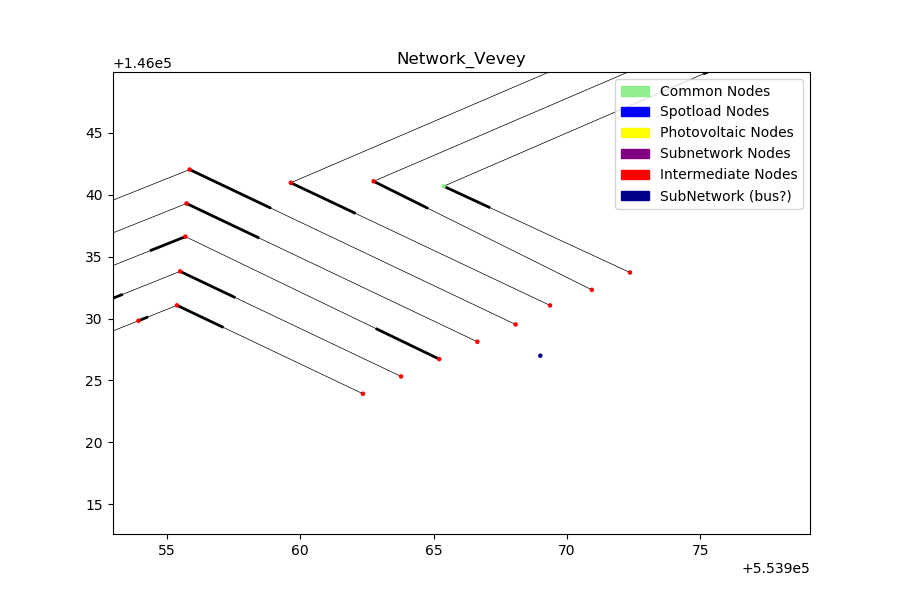

In [24]:
#nx.draw(DG,pos,with_labels=False, arrows=True)
plt.figure(1, figsize=(9.0, 6.0))
nx.draw_networkx(DG, pos,width=0.5, node_color=values, with_labels=False,node_size=5)
#nx.draw_networkx(DG, pos, node_color=values, with_labels=False,node_size=0.5)
plt.title('Network_Vevey')
#plt.ylim((145400, 146800))
#plt.xlim((553500, 554500))

lightgreen = mpatches.Patch(color="lightgreen", label='Common Nodes')
blue = mpatches.Patch(color="blue", label='Spotload Nodes')
yellow = mpatches.Patch(color="yellow", label='Photovoltaic Nodes')
purple = mpatches.Patch(color="purple", label='Subnetwork Nodes')
red = mpatches.Patch(color="red", label ='Intermediate Nodes')
darkblue = mpatches.Patch(color="darkblue", label ='SubNetwork (bus?)')
plt.legend(handles=[ lightgreen, blue, yellow, purple, red, darkblue])


plt.savefig('vevey_network.svg', format="svg")

plt.show()

### What am I doing? ###
#
# Draw graph, with attribut of the pos (coordinates) and the node_color

In [25]:
#nx.draw(DG,pos,with_labels=False, arrows=True)
#plt.figure(2, figsize=(9.0, 6.0))

#nx.draw_networkx(DG,pos, with_labels=False)
#plt.title('Guttenberg_Vevey')
#plt.ylim((280000, 720000))
#plt.xlim((780000, 920000))
#plt.show()

### What am I doing? ###
#
# Second draw of the intervall that is not to be considered, to check if "wrong" nodes appear.